In [ ]:
%matplotlib inline

# Linear Regression Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # For evaluation
from sklearn.metrics import mean_squared_error
np.random.seed(0)

# Generate/Load data From dataset

1.Load datasets available in sklearn

In [ ]:
# from sklearn import datasets
# X,y = datasets.load_diabetes(return_X_y=True)

2.Loading external dataset

In [ ]:
# import pandas as pd
# filename = 'winequality-red.csv'
# data = pd.read_csv(filename,header = 0,delimiter=';')
# X = data.values[:,:-1]
# y = data.values[:,-1]

3.Generate own data

In [ ]:
def gen_target(X):
    return (3.5 * X)+5
n_records = 300 # Total number of records
X = np.sort(np.random.rand(n_records)) # Randomly generate data points (features)
y = gen_target(X) + np.random.randn(n_records) * 0.1 # Generate regression output with a
X = X.reshape(-1,1)
print('Number of training examples : ',X.shape[0])
print('Number of predictors : ',y.shape[1] if len(y.shape)>1 else 1)

Number of training examples :  300
Number of predictors :  1


# Bulid and Evaluate model

Linear regression model parameteres

Coefficients : 

Intercept : 0.0000
Coef- 0 : 10.8209


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


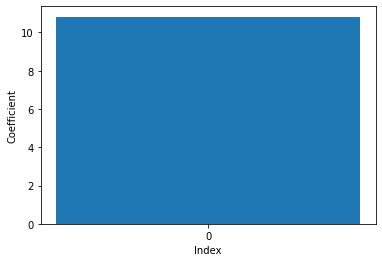


Mean squared error: 7.8296


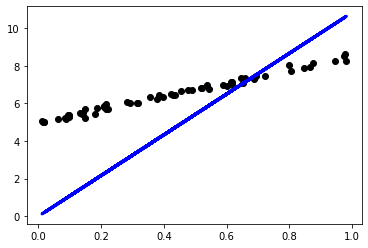

In [ ]:
X_train ,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2)
lr = LinearRegression(fit_intercept=False,normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Coefficients : \n")
print('Intercept : {0:2.4f}'.format(lr.intercept_))
for ii,coef in enumerate(lr.coef_):
    print('Coef-{0:2d} : {1:2.4f}'.format(ii,coef))
plt.bar(range(len(lr.coef_)),lr.coef_)
plt.xticks(range(len(lr.coef_)))
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.show()
print('\nMean squared error: {:2.4f}'.format(mean_squared_error(y_test,y_pred)))
if X.shape[1]<2:
    plt.figure()
    plt.scatter(X_test,y_test,color='black')
    plt.plot(X_test,y_pred,color='blue',linewidth=3)
    plt.show()
